<a href="https://colab.research.google.com/github/GSP31/GSP31/blob/main/Churn_Prediction_Logistic%2BRndmforest%2BSVM%2BDeployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1xW35fTEln2yMkUrlHY0u7IDzcGIjWWRS'}) # replace the id with id of file you want to access
downloaded.GetContentFile('customer_churn_large_dataset.xlsx')

# **1.Data Preprocessing**

### **Reading Dataset**

In [ ]:
data = pd.read_excel("customer_churn_large_dataset.xlsx")
data.shape # Calculating the dimensions of the dataset

(100000, 9)

In [ ]:
data.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


### **Checking Null Values**

In [ ]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

**No Null values in the dataset**

In [ ]:
data['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [ ]:
data['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [ ]:
data['Churn'].unique()

array([0, 1])

**No Discrepencies found in the Categorical values.**

In [ ]:
df=data.drop(['CustomerID','Name' ],axis=1)

**The Customer ID and Name can not played specifically any role since they are unique for each customer and just given on the presence of the positional hierarchy in the dataset which was not signifigant so dropping the name and csutomer id from the analysis**

In [ ]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,0,17,73.36,236,0
1,62,0,1,1,48.76,172,0
2,24,0,0,5,85.47,460,0
3,36,0,2,3,97.94,297,1
4,46,0,2,19,58.14,266,0


### **Exploratory Data Analysis**

In [ ]:
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['Gender'], **{})
chart

In [ ]:
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_9, *['Location'], **{})
chart

<ipython-input-123-a37e72bb04ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

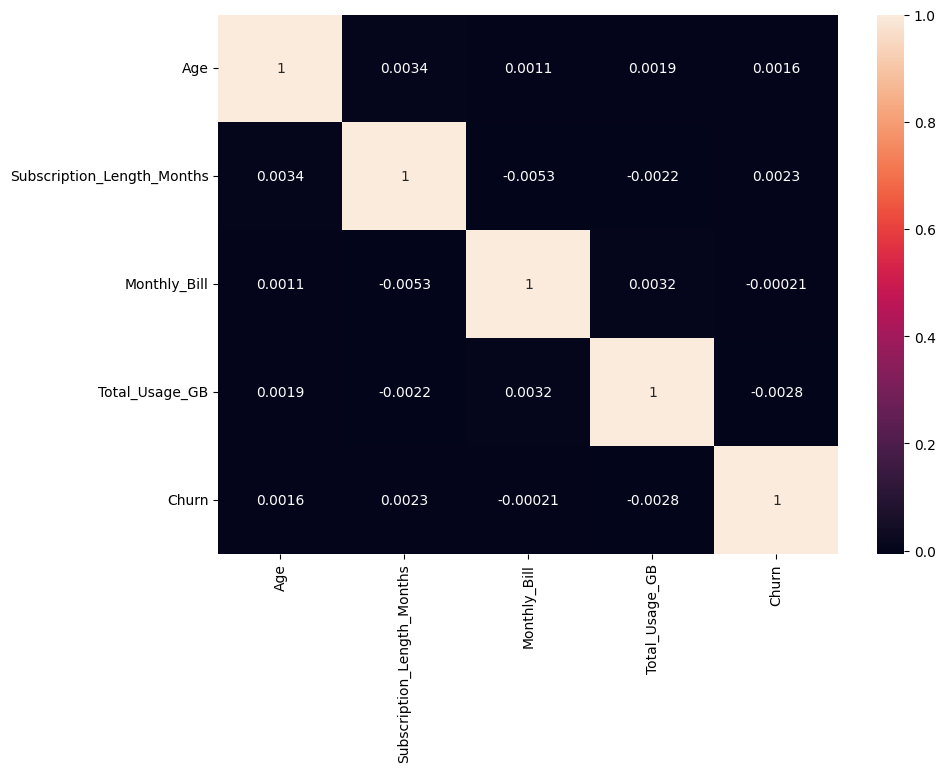

In [ ]:
plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

## ***Here We can See some obvious results like***


### *   If Subscription period is more then the Possibility of churn will be less
### *   If monthly bill is high then the Possibility of churn will be less
### *   If Internet usage is high the Possibility of churn will be less





### **Numbering Categorical Columns**

In [ ]:
df.replace({'Gender':{'Male':1,'Female':0},
                      'Location':{'Los Angeles':0,'New York':1,'Miami':2,'Chicago':3, 'Houston':4}},inplace=True)

In [ ]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,0,17,73.36,236,0
1,62,0,1,1,48.76,172,0
2,24,0,0,5,85.47,460,0
3,36,0,2,3,97.94,297,1
4,46,0,2,19,58.14,266,0


In [ ]:
#Define X and y
X = df.drop('Churn', axis=1)
y = df['Churn']


### **2.Feature Engineering**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
sub_vars = ['Age','Subscription_Length_Months',	'Monthly_Bill',	'Total_Usage_GB']
X_train[sub_vars] = scaler.fit_transform(X_train[sub_vars]) #output in pandas frame
X_train[sub_vars].head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
26309,0.057692,0.173913,0.363714,0.151111
83153,0.057692,0.478261,0.010286,0.595556
13022,0.442308,0.652174,0.046143,0.306667
8472,0.961538,0.347826,0.218143,0.177778
42546,0.326923,0.782609,0.772286,0.693333


In [ ]:
X_train.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
26309,0.057692,0,3,0.173913,0.363714,0.151111
83153,0.057692,1,4,0.478261,0.010286,0.595556
13022,0.442308,1,1,0.652174,0.046143,0.306667
8472,0.961538,1,4,0.347826,0.218143,0.177778
42546,0.326923,0,2,0.782609,0.772286,0.693333


### **3.Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Apply the scaler only to the specified numerical columns
X_test_scaled = X_test.copy()  # Create a copy to avoid modifying the original data
X_test_scaled[sub_vars] = scaler.transform(X_test[sub_vars])

### ***Evaluating The models- Logistic regression***

In [ ]:
ytrain_predictions_lr = lr.predict(X_train)

In [ ]:
rep = classification_report(y_train, ytrain_predictions_lr)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.50      0.67      0.58     40128
           1       0.50      0.33      0.40     39872

    accuracy                           0.50     80000
   macro avg       0.50      0.50      0.49     80000
weighted avg       0.50      0.50      0.49     80000



In [ ]:
ytest_predictions_lr = lr.predict(X_test_scaled)

In [ ]:
rep = classification_report(y_test, ytest_predictions_lr)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57     10093
           1       0.49      0.32      0.39      9907

    accuracy                           0.50     20000
   macro avg       0.49      0.50      0.48     20000
weighted avg       0.49      0.50      0.48     20000



### ***Evaluating The models- Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=4, n_estimators=70)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=70)

In [ ]:
ytrain_predictions_rf = rf.predict(X_train)

In [ ]:
rep = classification_report(y_train, ytrain_predictions_rf)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40128
           1       1.00      1.00      1.00     39872

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [ ]:
ytest_predictions_rf = rf.predict(X_test_scaled)

In [ ]:
rep = classification_report(y_test, ytest_predictions_rf)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51     10093
           1       0.49      0.47      0.48      9907

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [ ]:
print('Accuracy of training set', rf.score(X_train, y_train))

Accuracy of training set 1.0


In [ ]:
print('Accuracy of test set::', rf.score(X_test_scaled, y_test))

Accuracy of test set:: 0.4984


Clearly this model is overfit since the accuracy of train set is 100% while that of tes set is 49.84%

### ***Evaluating The models- Deep neural network***

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                350       
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 2)                 202       
                                                                 
Total params: 8,202
Trainable params: 8,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Sparse categorical cross entropy

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#history = model.fit(X_train, y_train, epochs=300, batch_size=64)
history = model.fit(X_train,y_train,validation_data=(X_test_scaled,y_test),epochs=200)

Epoch 1/200
2500/2500 [==============================] - 10s 3ms/step - loss: 0.6940 - accuracy: 0.4987 - val_loss: 0.6937 - val_accuracy: 0.5046
Epoch 2/200
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6933 - accuracy: 0.4996 - val_loss: 0.6935 - val_accuracy: 0.5046
Epoch 3/200
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6933 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4953
Epoch 4/200
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6933 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 5/200
2500/2500 [==============================] - 9s 3ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5026
Epoch 6/200
2500/2500 [==============================] - 9s 4ms/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 7/200
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_a

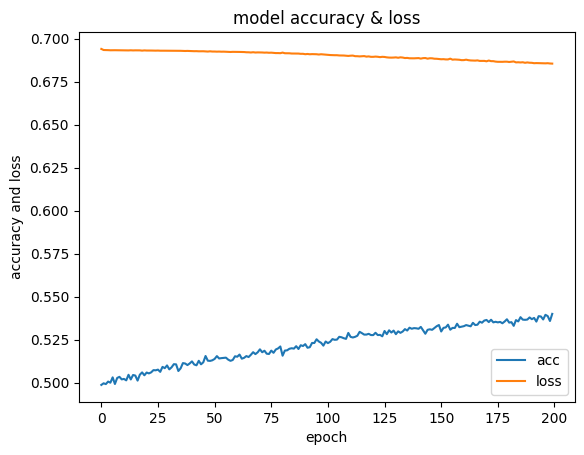

In [ ]:
#Visualize the models accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

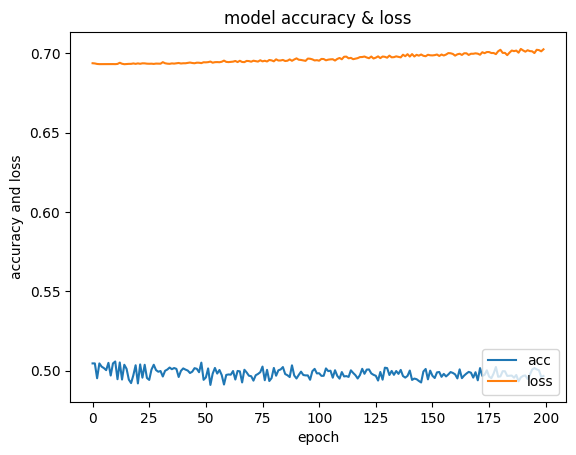

In [ ]:
#Visualize the model val accuracy and val loss
import matplotlib.pyplot as plt

plt.plot(history.history["val_accuracy"])
plt.plot(history.history["val_loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled)

625/625 [==============================] - 1s 1ms/step


In [ ]:
model.evaluate(X_test_scaled, y_test)

625/625 [==============================] - 1s 2ms/step - loss: 0.7024 - accuracy: 0.4967


[0.7024379968643188, 0.49674999713897705]

In [ ]:
#pred_test= model.predict(X_test)
score = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(score[1], 1 - score[1]))

Accuracy on test data: 0.49674999713897705% 
 Error on test data: 0.503250002861023


In [ ]:
#Shape
y_test.shape
y_pred.shape

(20000, 2)

In [ ]:
# argmax only for predictions as y_test is in 1D and predictions are in 2D

y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(20000,)

In [ ]:
print(confusion_matrix(y_pred,y_test))

[[4569 4541]
 [5524 5366]]


In [ ]:
rep = classification_report(y_test, y_pred)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.50      0.45      0.48     10093
           1       0.49      0.54      0.52      9907

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



Overall in three models the Deep neural network performance was slightly better so optimizng that model for analysis

### **4.Model Optimization**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

#Put previous run in comments first
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,
        verbose=1, mode='auto', restore_best_weights=True)


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),
        callbacks=[monitor],verbose=2,epochs=200)

Epoch 1/200
2500/2500 - 6s - loss: 0.6854 - accuracy: 0.5389 - val_loss: 962.1315 - val_accuracy: 0.5048 - 6s/epoch - 2ms/step
Epoch 2/200
2500/2500 - 6s - loss: 0.6854 - accuracy: 0.5398 - val_loss: 960.2219 - val_accuracy: 0.5048 - 6s/epoch - 2ms/step
Epoch 3/200
2500/2500 - 7s - loss: 0.6854 - accuracy: 0.5384 - val_loss: 903.3394 - val_accuracy: 0.5049 - 7s/epoch - 3ms/step
Epoch 4/200
2500/2500 - 6s - loss: 0.6854 - accuracy: 0.5395 - val_loss: 995.3988 - val_accuracy: 0.5048 - 6s/epoch - 2ms/step
Epoch 5/200
2500/2500 - 5s - loss: 0.6852 - accuracy: 0.5396 - val_loss: 1017.7152 - val_accuracy: 0.5048 - 5s/epoch - 2ms/step
Epoch 6/200
2500/2500 - 6s - loss: 0.6855 - accuracy: 0.5381 - val_loss: 944.8767 - val_accuracy: 0.5048 - 6s/epoch - 2ms/step
Epoch 7/200
2500/2500 - 7s - loss: 0.6853 - accuracy: 0.5383 - val_loss: 1060.3608 - val_accuracy: 0.5047 - 7s/epoch - 3ms/step
Epoch 8/200
Restoring model weights from the end of the best epoch: 3.
2500/2500 - 6s - loss: 0.6850 - accura

In [ ]:
y_pred_early = model.predict(X_test_scaled)

y_pred_early = np.argmax(y_pred_early,axis=1)
#expected_classes = np.argmax(y_test,axis=1)
correct = accuracy_score(y_test,y_pred_early)
print(f"Accuracy: {correct}")

625/625 [==============================] - 1s 2ms/step
Accuracy: 0.49575


In [ ]:
y_pred_early2 = model.predict(X_train)

y_pred_early2 = np.argmax(y_pred_early2,axis=1)
#expected_classes = np.argmax(y_test,axis=1)
correct = accuracy_score(y_train,y_pred_early2)
print(f"Accuracy: {correct}")

2500/2500 [==============================] - 5s 2ms/step
Accuracy: 0.5434625


In [ ]:
rep = classification_report(y_test, y_pred_early)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47     10093
           1       0.49      0.55      0.52      9907

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



### **as we can see here comparing optimalistic results and post processing the early stop deep neural network has performed the best so choosing early stop deep neural network for deployment**

### **5.Model Deployment**

### **Making a Predictive System**

In [ ]:
Num_Columns = [0,3,4,5]

In [ ]:
import numpy as np

# Example input data
input_data = np.array([(500, 1, 2, 50, 97.94, 297)])
input_data_reshaped = input_data.reshape(1, -1)

num_columns = [0, 3, 4, 5]  # Index positions of the numerical columns to scale

# Apply the scaler only to the specific numerical columns
scaled_data = input_data_reshaped.copy()  # Create a copy to avoid modifying the original data
scaled_data[:, num_columns] = scaler.transform(scaled_data[:, num_columns])

# Perform the prediction using your classifier
prediction = lr.predict(scaled_data)

if prediction[0] == 0:
    print('The person will not churn')
else:
    print('The person will churn')


The person will churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('trained_model.pkl','wb'))

import streamlit as st
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

loaded_model = pickle.load(open('trained_model.pkl', 'rb'))

# Mapping dictionaries
gender_mapping = {'Male': 1, 'Female': 0}
location_mapping = {'Los Angeles': 0, 'New York': 1, 'Miami': 2, 'Chicago': 3, 'Houston': 4}

# creating a function for Prediction
def churn_prediction(input_data):
    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    num_columns = [0, 3, 4, 5]  # Index positions of the numerical columns to scale

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    input_data_reshaped = input_data_reshaped.astype(float)

    # Fit the scaler with the data used for prediction
    scaler.fit(input_data_reshaped[:, num_columns])

    # Apply the scaler only to the specific numerical columns
    scaled_data = input_data_reshaped.copy()  # Create a copy to avoid modifying the original data
    scaled_data[:, num_columns] = scaler.transform(scaled_data[:, num_columns])

    print("Input data:", input_data_reshaped)
    print("Input data shape:", input_data_reshaped.shape)
    print("Input data dtype:", input_data_reshaped.dtype)

    prediction = loaded_model.predict(input_data_reshaped)

    if prediction[0] == 0:
        return 'The person will not churn'
    else:
        return 'The person will churn'

def main():
    # giving a title
    st.title('Churn Prediction Web App')
    html_temp = """
      <div style="background-color:teal ;padding:10px">
      <h2 style="color:white;text-align:center;">Churn Prediction</h2>
      </div>
      """
    st.markdown(html_temp, unsafe_allow_html=True)

    # getting the input data from the user
    Age = st.text_input('Age')
    Gender = st.selectbox('Gender', list(gender_mapping.keys()))
    Location = st.selectbox('Location', list(location_mapping.keys()))
    Subscription_Length_Months = st.text_input('Subscription months')
    Monthly_Bill = st.text_input('Monthly Bill')
    Total_Usage_GB = st.text_input('Data Usage in GB')



    # Mapping selected values to numeric values
    gender_numeric = int(gender_mapping[Gender])
    location_numeric = int(location_mapping[Location])

    # Code for Prediction
    Churn = ''

    # Creating a button for Prediction
    if st.button('Churn Prediction'):
        Churn = churn_prediction(
            [Age, gender_numeric, location_numeric, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB])

    st.success(Churn)

if __name__ == '__main__':
    main()

